# This is heart diesease prediction Project
> we are going to predict based on the data whether someone have the heart diesease or not 

* 1- Problem Defination
* 2- Data
* 3- Evaluate
* 4- Features
* 5- Modelling
* 6- Experimentation

# 1- Problem defination
> Based in the given data we need to predict if a patient has heart diesease or no

# 2- Data
> We have the data and have loaded it ahead

# 3- Evaluate
> In initial stages we need to make sure that our model should give us the accuracy of about 95%

# 4- Features
> What features are import what features columns means what

# 5- Tools Preparation

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# importing models for sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# import Evaluation Libraries
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, auc

# 6- Exploratory Data Analysis
1- What problem I am going to solve
2- What kind of data I have
3- Does this data have missing values
4- Are there any outliers, sporious vectors
5- Can we add or remove some of the features

In [2]:
df = pd.read_csv('heart_desease_data.csv')
df.shape

(303, 14)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

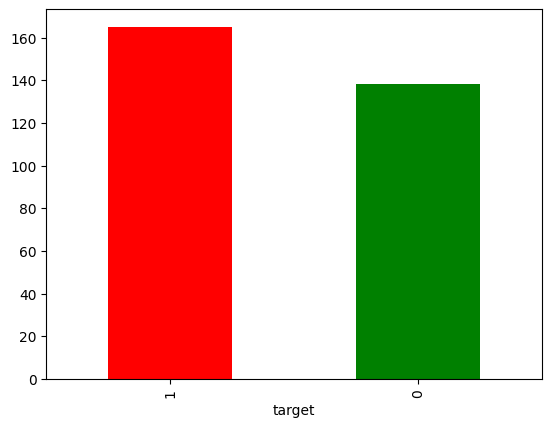

In [6]:
df['target'].value_counts().plot(kind='bar',color=['red','green']);

In [7]:
df.isna().sum() # are there any missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [10]:
len(df)

303

In [11]:
pd.crosstab(df['target'],df['sex'])

sex,0,1
target,,
0,24,114
1,72,93


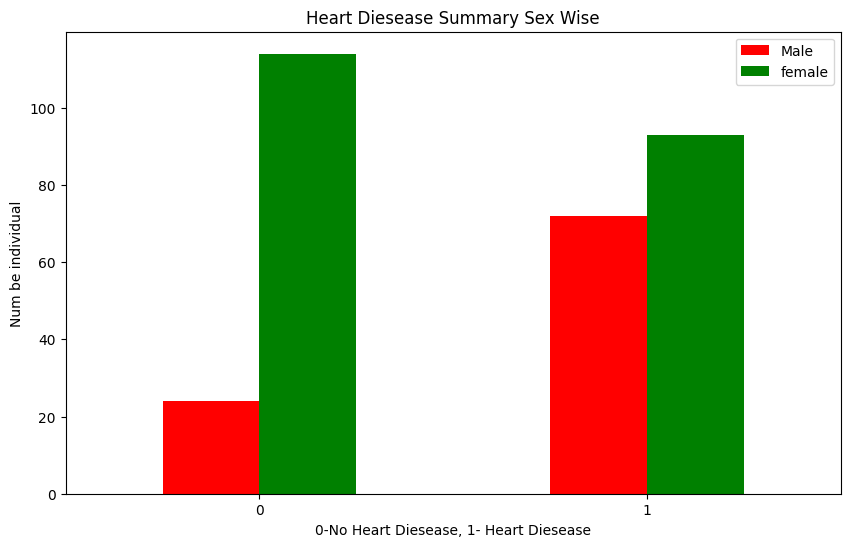

In [12]:
pd.crosstab(df['target'],df['sex']).plot(kind='bar',
                                        figsize=(10,6),
                                        color=['red','green'])
plt.title("Heart Diesease Summary Sex Wise")
plt.xlabel('0-No Heart Diesease, 1- Heart Diesease')
plt.ylabel('Num be individual')
plt.legend(["Male", "female"]);
plt.xticks(rotation=0);

In [13]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

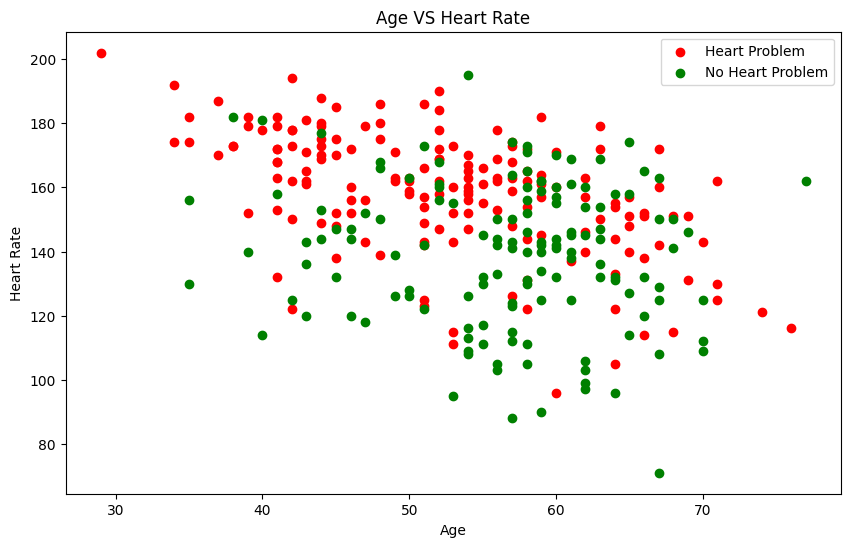

In [14]:
# Finding Patterns in DAta Using Scatter Plot
plt.figure(figsize=(10,6))
# Create scatter plot
# thalach is max heart rate achieved
# compare age with thalach
plt.scatter(df.age[df.target==1],df.thalach[df.target==1], c="red")
# with no heart diesease
plt.scatter(df.age[df.target==0],df.thalach[df.target==0], c="green")
plt.title("Age VS Heart Rate")
plt.xlabel("Age")
plt.ylabel("Heart Rate")
plt.legend(["Heart Problem", "No Heart Problem"])

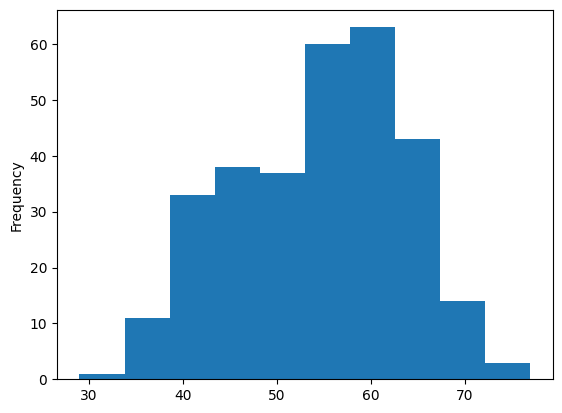

In [15]:
# Create histogram to see age distribution
df.age.plot.hist();

In [16]:
df.cp.value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

# cp chest pain type 
-- value 0: typical angina 
-- value 1: atypical angina
-- value 2: non-anginal
-- value 3: asymptomatic

In [17]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


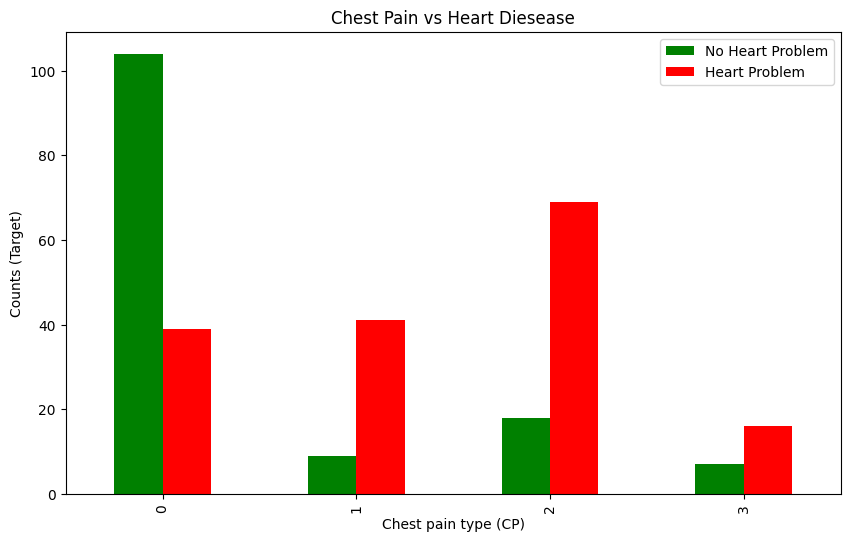

In [18]:
# Make the Bar Chart of Chest pain vs target
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                 figsize=(10,6),
                                 color=['green','red'])
# Make Some Discription of the chart
plt.title('Chest Pain vs Heart Diesease')
plt.xlabel('Chest pain type (CP)')
plt.ylabel('Counts (Target)')
plt.legend(['No Heart Problem','Heart Problem']);

# Correlation Matrix Part-1

In [19]:
# this tells relation with all columns with eachother
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


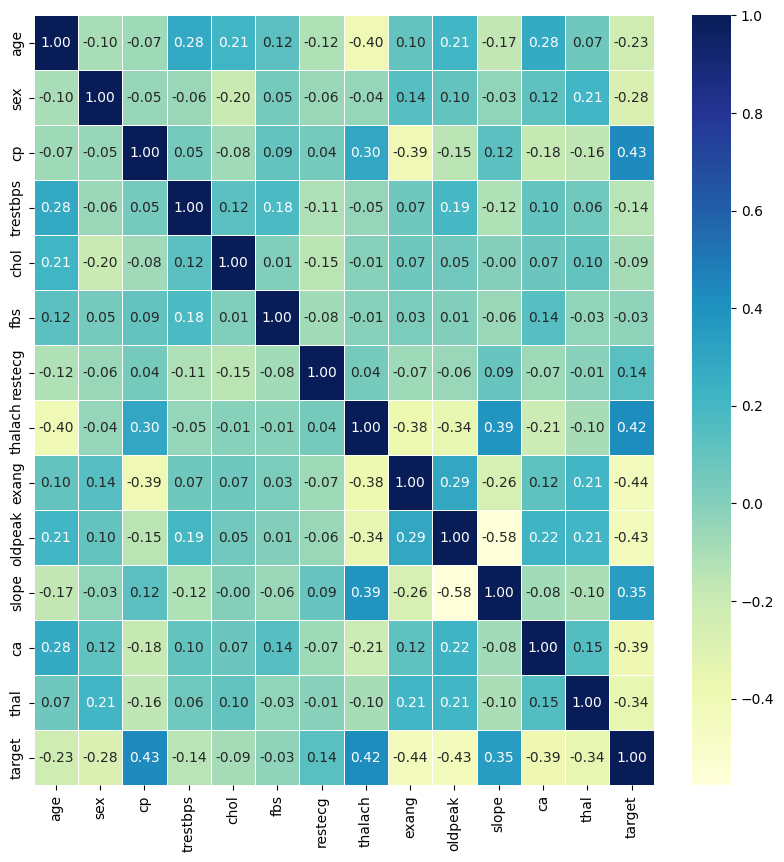

In [20]:
corr = df.corr()
home,room = plt.subplots(figsize=(10,10))
room = sns.heatmap(corr,
                  annot=True,
                  linewidths=0.5,
                  fmt='0.2f',
                  cmap='YlGnBu');

# Modeling

In [21]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [22]:
# Split into test and train data
X = df.drop('target', axis=1)
y = df['target']
# using Random seed, so that others could produce the same results
np.random.seed(7)
# split into test and train data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [23]:
len(X_train)

242

In [24]:
len(X)

303

# The models we are going to use
1- K_Nearest Neighbours Classifier
2- Random Forest Classifier
3- Logistic Regression

In [25]:
# putting models into a dictionary
models = {"KNN":KNeighborsClassifier(),
         "Random Forest":RandomForestClassifier(),
         "Logistic Regression":LogisticRegression()}

# create Function to evaluate the models

def fit_and_score(models,X_train,X_test,y_train,y_test):
    np.random.seed(7)
    # make a dictionary to save the score of model
    model_score = {}
    # looping through
    for name,model in models.items():
        model.fit(X_train,y_train)
    # evaluate the model and append it score
        model_score[name] = model.score(X_test,y_test)
    return model_score

In [26]:
model_scores = fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

C:\Users\Nawrozi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.5573770491803278,
 'Random Forest': 0.7213114754098361,
 'Logistic Regression': 0.7377049180327869}

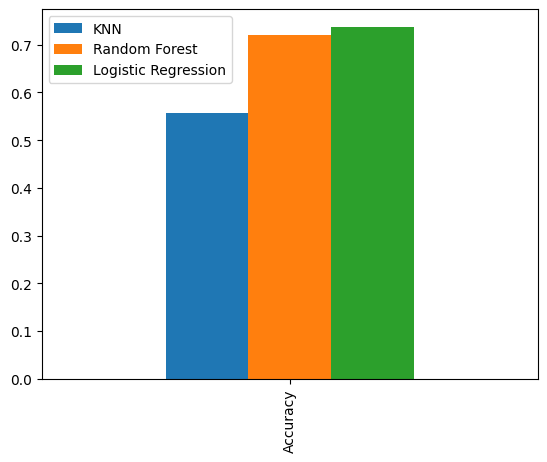

In [27]:
model_compare = pd.DataFrame(model_scores,index=["Accuracy"])
model_compare.plot.bar();

# Universal methods used for all type of classifications
Universal Methods

    * Hyperparameter Tunning
    * Features Improving

Advance Level

    * Confusion_Matrix
    * Cross Validation
    * Precision
    * Recall
    * f1
    * Classification Report
    * ROC Curve


    * Hyperparameter Tunning
    * Features Improving

In [28]:
KNN=KNeighborsClassifier()
KNN.set_params

<bound method BaseEstimator.set_params of KNeighborsClassifier()>

In [29]:
# 
train_score = []
test_score = []

# set range
nneighbours = range(1,30)
# set KNiehbour instanse
KNN = KNeighborsClassifier()
# Looping through
for i in nneighbours:
    # fit the model
    KNN.set_params(n_neighbors=i)
    KNN.fit(X_train,y_train)
    # updating the training score
    train_score.append(KNN.score(X_train,y_train))
    # updating the test score
    test_score.append(KNN.score(X_test,y_test))
    

In [30]:
train_score

[1.0,
 0.8099173553719008,
 0.7768595041322314,
 0.756198347107438,
 0.7603305785123967,
 0.731404958677686,
 0.743801652892562,
 0.7148760330578512,
 0.71900826446281,
 0.731404958677686,
 0.7272727272727273,
 0.7231404958677686,
 0.731404958677686,
 0.71900826446281,
 0.7148760330578512,
 0.6900826446280992,
 0.7272727272727273,
 0.71900826446281,
 0.7107438016528925,
 0.7066115702479339,
 0.7024793388429752,
 0.7024793388429752,
 0.7107438016528925,
 0.6900826446280992,
 0.7107438016528925,
 0.7066115702479339,
 0.7107438016528925,
 0.7066115702479339,
 0.7066115702479339]

In [31]:
test_score

[0.6065573770491803,
 0.6557377049180327,
 0.6229508196721312,
 0.6229508196721312,
 0.5573770491803278,
 0.639344262295082,
 0.6721311475409836,
 0.6557377049180327,
 0.6065573770491803,
 0.6065573770491803,
 0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6557377049180327,
 0.6557377049180327,
 0.6557377049180327,
 0.6721311475409836,
 0.6721311475409836,
 0.6557377049180327,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7049180327868853,
 0.6557377049180327]

# Plot the accuracy score

Maximum Accuracy tunning Hyperparameter is: 70.49%


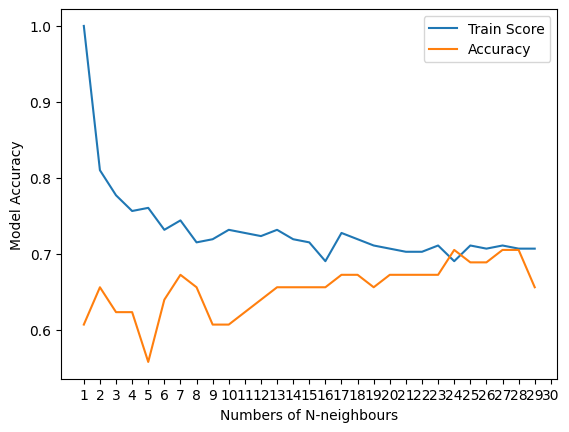

In [32]:
plt.plot(nneighbours,train_score,label="Train Score")
plt.plot(nneighbours,test_score,label="Accuracy")
plt.xticks(np.arange(1,31,1))
plt.xlabel("Numbers of N-neighbours")
plt.ylabel("Model Accuracy")
plt.legend()
print(f"Maximum Accuracy tunning Hyperparameter is: {max(test_score)*100:0.2f}%")

# Hyperparameters tunning using Randomized Search CV
    * LogisticRegression()
    * RandomForestClassifier()

In [33]:
LR_hp = {
        "C": np.logspace(-4,4,30),
        "solver":["liblinear"]
        }
RFC_hp = {
    "n_estimators":np.arange(10,1600,100),
    "max_depth":[None, 3,5,6,10],
    "min_samples_split":np.arange(2,20,2),
    "min_samples_leaf":np.arange(1,20,2),
}

In [34]:
# Tune Logistic Regression
np.random.seed(7)
# Lets use RSCV to tune Hyperparameter
lr = RandomizedSearchCV(LogisticRegression(),
                       param_distributions=LR_hp,
                       cv=5,
                       n_iter=20,
                       verbose=True)
# fit the model
lr.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [35]:
lr.score(X_test,y_test)

0.7540983606557377

In [36]:
lr.best_params_

{'solver': 'liblinear', 'C': 0.38566204211634725}

In [37]:
# Tune RandomForestClassifier() 
np.random.seed(7)
# Lets use RSCV to tune Hyperparameter
RFC = RandomizedSearchCV(RandomForestClassifier(),
                       param_distributions=RFC_hp,
                       cv=5,
                       n_iter=20,
                       verbose=True)
# fit the model
RFC.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 6, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([  10,  110,  210,  310,  410,  510,  610,  710,  810,  910, 1010,
       1110, 1210, 1310, 1410, 1510])},
                   verbose=True)

In [38]:
RFC.score(X_test,y_test)

0.7049180327868853

In [39]:
RFC.best_params_

{'n_estimators': 710,
 'min_samples_split': 16,
 'min_samples_leaf': 19,
 'max_depth': 6}

 * 'KNN': 0.5573770491803278,
 * 'Random Forest': 0.7213114754098361,
 * 'Logistic Regression': 0.7377049180327869

### Random Forest becomes more odd after tunning Hyperparameters

# Till now we have done 
* 1. By Hand tunning Hyperparameter
* 2. RandomizedSearchCV()
# Now we are going to check accuracy using
* 1. GridSearchCV()

In [40]:
# Tune Logistic Regression using GridSearcgCV()
np.random.seed(7)
# Lets use RSCV to tune Hyperparameter
lr_gs = GridSearchCV(LogisticRegression(),
                       param_grid=LR_hp,
                       cv=5,
                       # n_iter=20, we not give iterations in GridSearchCV()
                       verbose=True)
# fit the model
lr_gs.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [41]:
lr_gs.score(X_test,y_test)

0.7540983606557377

In [42]:
lr_gs.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [44]:
# Tune RandomForestClassifier() using GridSeacrhCV()
np.random.seed(7)
RFC_hp = {
    "n_estimators":np.arange(51),
    "max_depth":[None],
    "min_samples_split":np.arange(6),
    "min_samples_leaf":np.arange(3),
}
# Lets use RSCV to tune Hyperparameter
RFC_GSCV = GridSearchCV(RandomForestClassifier(),
                       param_grid=RFC_hp,
                       cv=5,
                       # n_iter=20, it will take all interations not only 20
                       verbose=True)
# fit the model
RFC_GSCV.fit(X_train,y_train)

Fitting 5 folds for each of 918 candidates, totalling 4590 fits


C:\Users\Nawrozi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
2590 fits failed out of a total of 4590.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1530 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Nawrozi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Nawrozi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\Nawrozi\AppData\Local\Programs\Python\Python311\Lib\site-packages\s

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None],
                         'min_samples_leaf': array([0, 1, 2]),
                         'min_samples_split': array([0, 1, 2, 3, 4, 5]),
                         'n_estimators': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])},
             verbose=True)

# Improving the Tunning Model
Universal Methods used for all classifications problems

* Hyperparameter Tunning # Done
* Features Improving # not touched yet

Advanced Level
* ROC Curve
* Confusion Matrix
* Cross Validation
* Precision
* Recall
* f1
* Classification Report

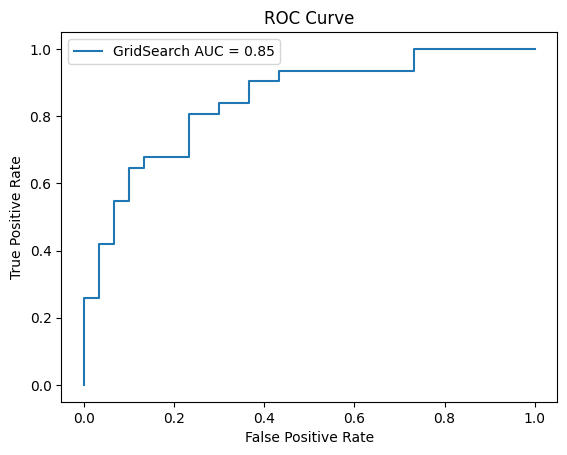

In [67]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming lr_gs is your trained Logistic Regression model
y_pred = lr_gs.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr, label=f'GridSearch AUC = {auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [78]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming y_pred contains predicted probabilities
# Binarize predicted probabilities using a threshold
threshold = 0.5  # You can adjust this threshold as needed
y_pred_binary = np.where(y_pred >= threshold, 1, 0)

# Now, call confusion_matrix with the corrected inputs
cm = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[18 12]
 [ 3 28]]


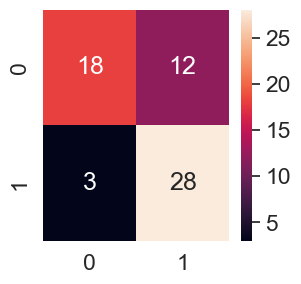

In [85]:
sns.set(font_scale=1.5)

def plot_confusion(y_test,y_pred):

    "This is plot for confusion matrix"

fig,ax = plt.subplots(figsize=(3,3))
ax = sns.heatmap(confusion_matrix(y_test,y_pred_binary),
                annot=True,
                #char=False
                )
plot_confusion(y_test,y_pred_binary)

# Lets Plot the classification report

In [87]:
print(classification_report(y_test,y_pred_binary))

              precision    recall  f1-score   support

           0       0.86      0.60      0.71        30
           1       0.70      0.90      0.79        31

    accuracy                           0.75        61
   macro avg       0.78      0.75      0.75        61
weighted avg       0.78      0.75      0.75        61



In [89]:
lr_gs.best_params_
lr = LogisticRegression(C=0.38566204211634725,
                       solver='liblinear')

In [90]:
# Cross validation accuracy
cv_accuracy = cross_val_score(lr,
                             X,
                             y,
                             cv=7,
                             scoring="accuracy")
cv_accuracy = np.mean(cv_accuracy)
cv_accuracy

0.8317728782845061

In [92]:
# Cross Validation Precision
cv_precision = cross_val_score(lr,
                             X,
                             y,
                             cv=7,
                             scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8114861329147044

In [94]:
# Cross Validation Recall
cv_recall = cross_val_score(lr,
                             X,
                             y,
                             cv=7,
                             scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.902432712215321

In [95]:
# Cross Validation f1
cv_f1 = cross_val_score(lr,
                        X,
                        y,
                        cv=7,
                        scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8539934215444419

# Visualizing the Cross Validation Matrices

<Axes: title={'center': 'Comparison of the Matrices'}>

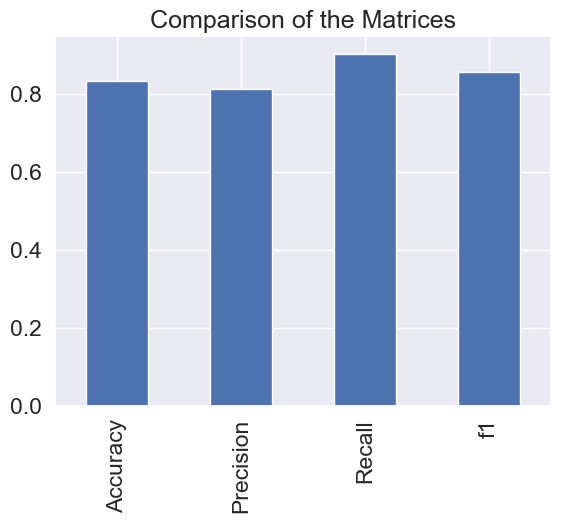

In [101]:
cv_plot = pd.DataFrame({
    "Accuracy" : cv_accuracy,
    "Precision": cv_precision,
    "Recall":cv_recall,
    "f1":cv_f1
},index=[0])
cv_plot.T.plot.bar(title="Comparison of the Matrices",
                legend=False)

In [103]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [106]:
# coefficient Function
lr.fit(X_train,y_train)
lr.coef_

array([[ 0.02197276, -1.18335566,  0.75710289, -0.02334271, -0.00174924,
         0.35581926,  0.35391428,  0.03440751, -0.7002588 , -0.56110359,
         0.46102563, -0.61500865, -1.02087051]])

In [111]:
final_coef = dict(zip(df.columns,list(lr.coef_[0])))
final_coef

{'age': 0.02197276124075566,
 'sex': -1.183355657840582,
 'cp': 0.7571028884287043,
 'trestbps': -0.02334271322740683,
 'chol': -0.001749236426133418,
 'fbs': 0.35581926335826397,
 'restecg': 0.35391427881049925,
 'thalach': 0.0344075086077208,
 'exang': -0.7002587999563804,
 'oldpeak': -0.561103591987946,
 'slope': 0.461025630955937,
 'ca': -0.6150086538506152,
 'thal': -1.0208705088871866}

<Axes: title={'center': 'Features Importance'}>

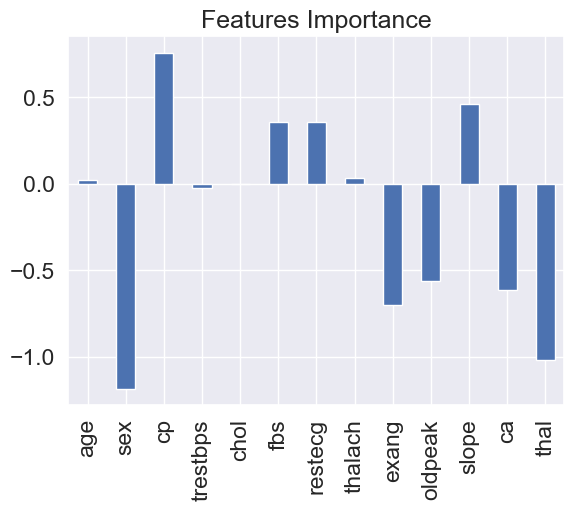

In [115]:
features = pd.DataFrame(final_coef,index=[0])
features.T.plot.bar(title="Features Importance", legend=False)

* We set 95% accuracy goal, but we did not meet
We can ask some Question
* What if we try to get mode data
* What if we try to improve the quality of the data
* What if we try to use other models and see if there is any improvements